In [40]:
import pandas as pd
from matplotlib import rc
from matplotlib import pyplot as plt
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

rc('font', **font)

In [41]:
# Load Data
scaling = ['raw','normalized','stdScaled']
dfs = {key: pd.read_json(f'single_feature_{key}_metrics.json') for key in scaling}

avg:cpu_nice         -0.004602
avg:fan2_1           -0.002440
avg:fan1_1           -0.002049
avg:pkts_in          -0.001797
all                  -0.001771
                        ...   
avg:p1_core10_temp    0.000587
avg:fan_disk_power    0.000699
avg:fan1_0            0.001444
avg:fan0_1            0.002001
avg:fan3_1            0.002628
Name: DIFF_f1_LogReg, Length: 116, dtype: float64

avg:gpu3_mem_temp   -0.001220
avg:p0_mem_power    -0.000797
avg:fan1_1          -0.000674
avg:fan2_0          -0.000516
avg:fan2_1          -0.000276
                       ...   
avg:mem_buffers      0.000054
avg:dimm6_temp       0.000186
avg:fan0_1           0.000532
all                  0.000869
avg:dimm2_temp       0.001042
Name: DIFF_f1_SVC, Length: 116, dtype: float64

avg:bytes_in        -5.021982e-01
avg:bytes_out       -4.830268e-01
avg:mem_cached      -4.033885e-01
avg:mem_free        -3.504378e-01
avg:pkts_in         -2.961817e-01
                         ...     
avg:mem_buffers     -2.141467e-04
avg:boottime        -9.088940e-05
avg:part_max_used   -3.599540e-05
avg:cpu_wio         -4.073400e-06
avg:mem_total       -7.520000e-07
Name: DIFF_f1_DecTree, Length: 116, dtype: float64

avg:swap_total    -0.006401
avg:mem_total     -0.006401
avg:swap_free     -0.005062
avg:boottime      -0.003950
all               -0.003097
                     ...   
avg:bytes_in       0.000071
avg:mem_cached     0.000472
avg:bytes_out      0.000557
avg:mem_buffers    0.000822
avg:proc_total     0.001209
Name: DIFF_f1_LogReg, Length: 116, dtype: float64

avg:dimm14_temp     -0.001766
avg:p1_core2_temp   -0.000961
avg:dimm8_temp      -0.000396
avg:dimm0_temp      -0.000390
avg:cpu_system      -0.000385
                       ...   
avg:proc_total       0.002016
avg:dimm4_temp       0.002468
avg:dimm12_temp      0.002812
avg:dimm7_temp       0.002817
avg:dimm6_temp       0.002909
Name: DIFF_f1_SVC, Length: 116, dtype: float64

avg:boottime      -0.368557
all               -0.302006
avg:mem_free      -0.287315
avg:mem_total     -0.186317
avg:mem_cached    -0.049489
                     ...   
avg:fan3_1        -0.000003
avg:fan1_1        -0.000003
avg:fan0_1        -0.000003
avg:mem_buffers   -0.000003
avg:fan2_1         0.000016
Name: DIFF_f1_DecTree, Length: 116, dtype: float64

all                  -0.055036
avg:cpu_nice         -0.004602
avg:bytes_out        -0.004039
avg:pkts_in          -0.000792
avg:gpu3_mem_temp    -0.000600
                        ...   
avg:gpu3_core_temp    0.000443
avg:dimm10_temp       0.000456
avg:fan1_1            0.000510
avg:p1_core10_temp    0.000587
avg:fan_disk_power    0.000699
Name: DIFF_f1_LogReg, Length: 116, dtype: float64

avg:p0_mem_power    -0.000797
avg:gpu3_mem_temp   -0.000779
avg:fan1_1          -0.000674
avg:fan2_0          -0.000516
all                 -0.000465
                       ...   
avg:mem_cached       0.000015
avg:proc_run         0.000037
avg:mem_buffers      0.000054
avg:fan0_1           0.000532
avg:dimm2_temp       0.001042
Name: DIFF_f1_SVC, Length: 116, dtype: float64

avg:bytes_in        -4.999477e-01
avg:bytes_out       -4.822188e-01
avg:mem_cached      -4.050091e-01
avg:mem_free        -3.504378e-01
avg:pkts_in         -2.960512e-01
                         ...     
avg:mem_buffers     -2.141467e-04
avg:boottime        -9.088940e-05
avg:part_max_used   -3.599540e-05
avg:cpu_wio         -4.073400e-06
avg:mem_total       -7.520000e-07
Name: DIFF_f1_DecTree, Length: 116, dtype: float64

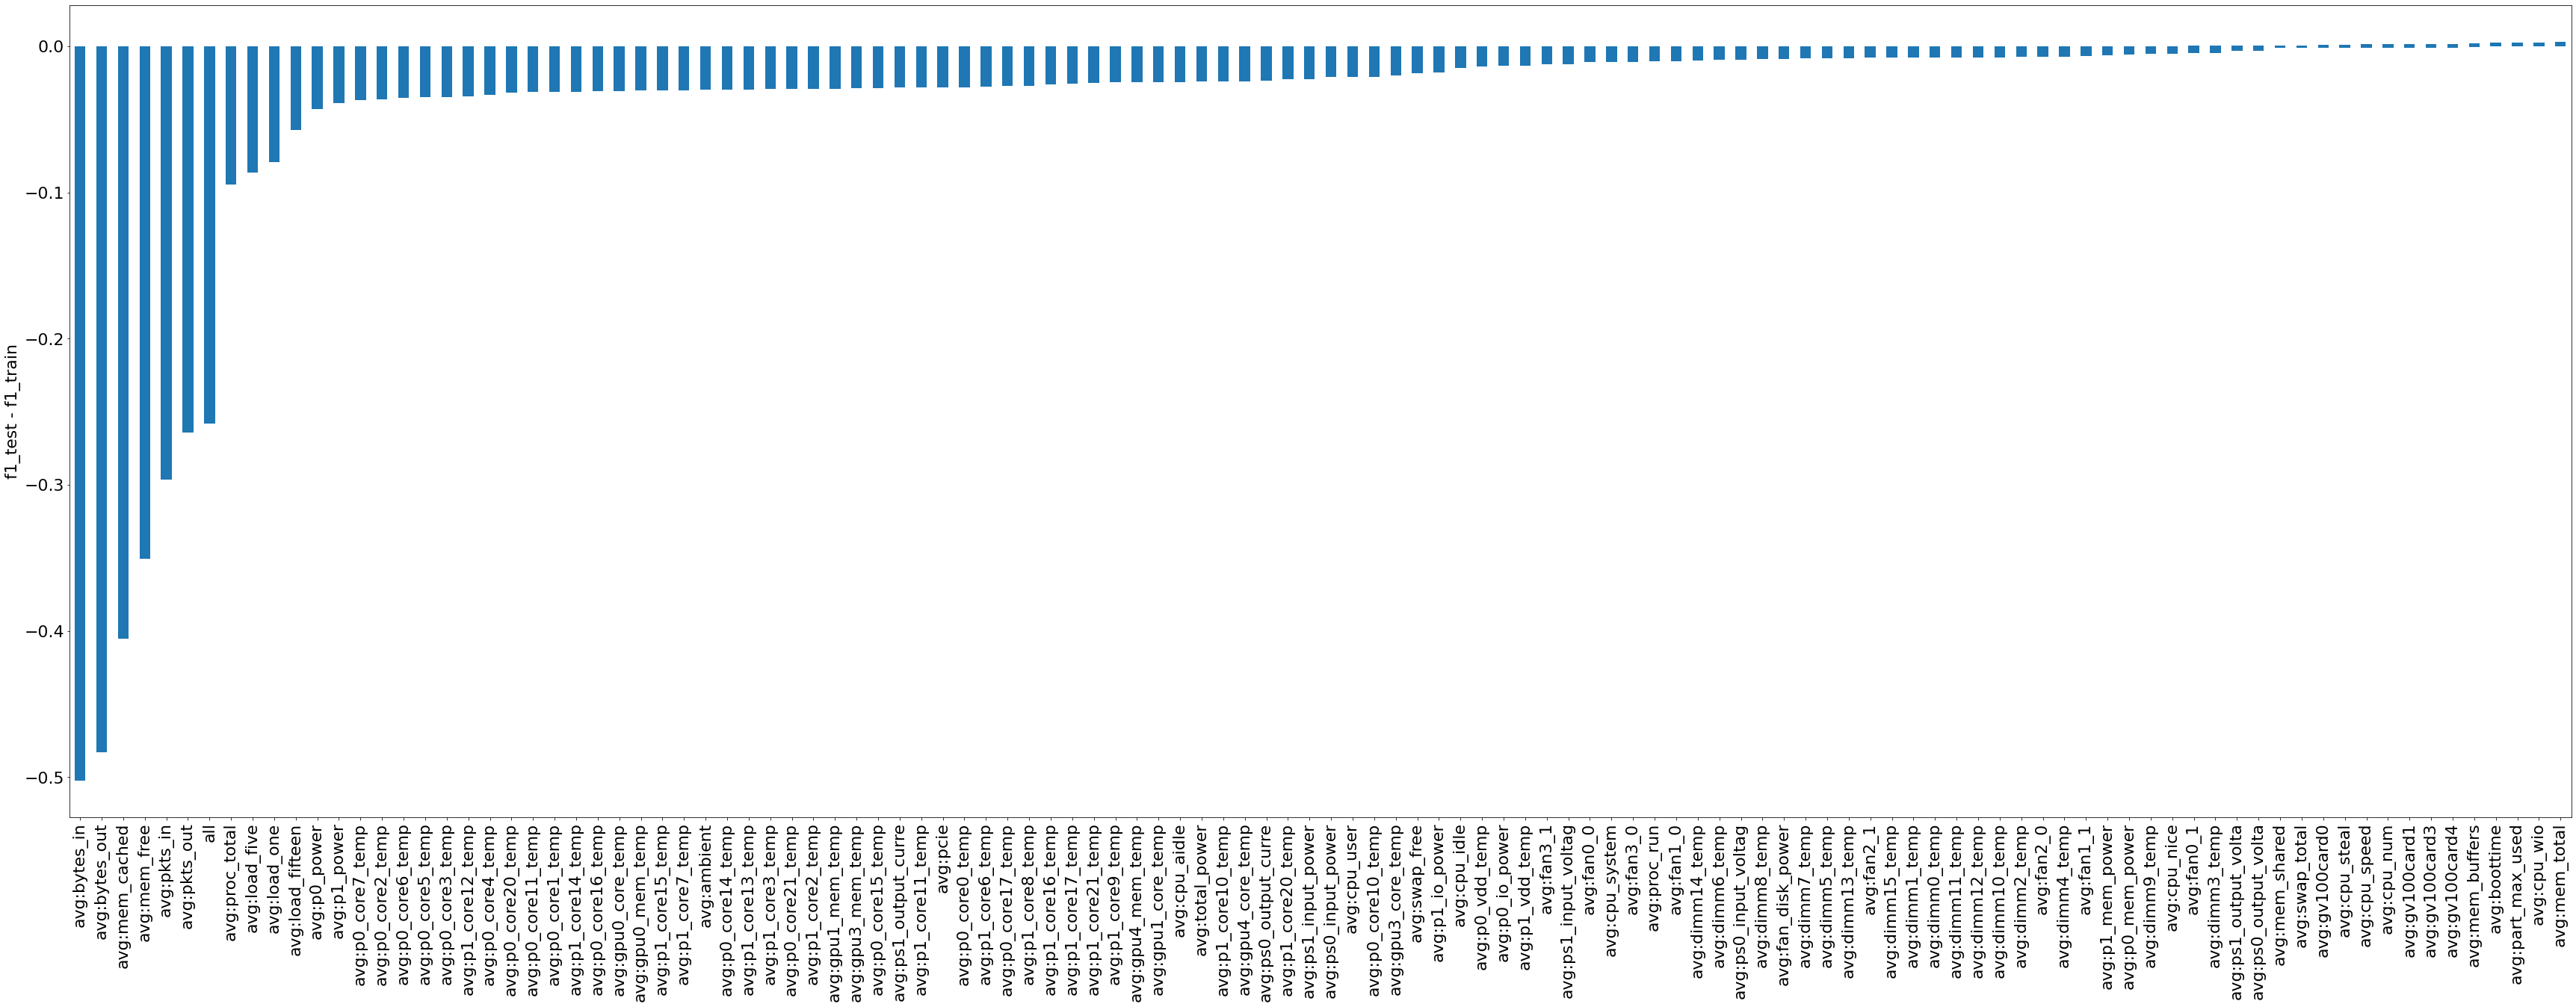

In [46]:
# Inspect overfitting for raw data
for key in scaling:
    for model in ['LogReg','SVC','DecTree']:
        feature = f'DIFF_f1_{model}'
        display(dfs[key].sort_values(feature)[feature])
        dfs[key].sort_values(feature)[feature].plot(kind = 'bar', figsize = (60,20))
        plt.ylabel('f1_test - f1_train')
        plt.savefig(f'{feature}_{key}.jpeg')